In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')


In [2]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)

m, n = data.shape

np.random.shuffle(data)

dev_set_size = 1000

data_dev = data[:dev_set_size].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n] / 255.0  

data_train = data[dev_set_size:].T
Y_train = data_train[0]
X_train = data_train[1:n] / 255.0  

_, m_train = X_train.shape

In [4]:
Y_train

array([4, 2, 0, ..., 4, 0, 4])

In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [6]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [7]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [8]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [9]:
def ReLU_deriv(Z):
    return Z > 0

In [10]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [11]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


In [12]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [13]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [14]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [15]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [16]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[8 8 8 ... 2 8 2] [4 2 0 ... 4 0 4]
0.1257560975609756
Iteration:  10
[8 8 0 ... 2 3 3] [4 2 0 ... 4 0 4]
0.22795121951219513
Iteration:  20
[8 8 0 ... 2 3 9] [4 2 0 ... 4 0 4]
0.28324390243902436
Iteration:  30
[8 8 0 ... 2 0 9] [4 2 0 ... 4 0 4]
0.3772439024390244
Iteration:  40
[8 8 0 ... 4 0 9] [4 2 0 ... 4 0 4]
0.443
Iteration:  50
[8 8 0 ... 4 0 9] [4 2 0 ... 4 0 4]
0.5039268292682927
Iteration:  60
[8 8 0 ... 4 0 9] [4 2 0 ... 4 0 4]
0.5496341463414635
Iteration:  70
[8 8 0 ... 4 0 9] [4 2 0 ... 4 0 4]
0.5858292682926829
Iteration:  80
[2 2 0 ... 4 0 9] [4 2 0 ... 4 0 4]
0.6144146341463415
Iteration:  90
[2 2 0 ... 4 0 9] [4 2 0 ... 4 0 4]
0.6366341463414634
Iteration:  100
[2 2 0 ... 4 0 9] [4 2 0 ... 4 0 4]
0.6554146341463415
Iteration:  110
[2 2 0 ... 4 0 4] [4 2 0 ... 4 0 4]
0.6708780487804878
Iteration:  120
[2 2 0 ... 4 0 4] [4 2 0 ... 4 0 4]
0.6836341463414635
Iteration:  130
[2 2 0 ... 4 0 4] [4 2 0 ... 4 0 4]
0.6964878048780487
Iteration:  140
[2 2 0 ... 4

In [17]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [18]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  9


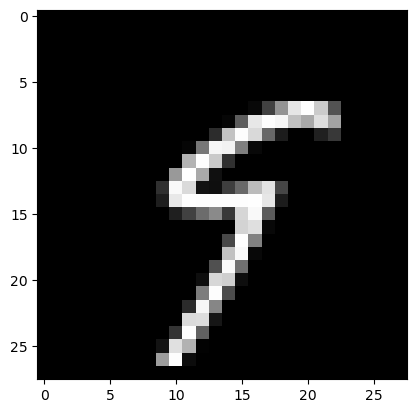

Prediction:  [2]
Label:  2


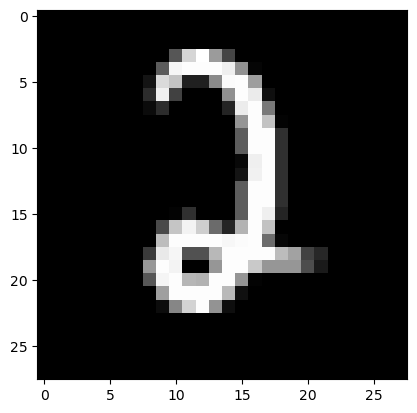

Prediction:  [0]
Label:  0


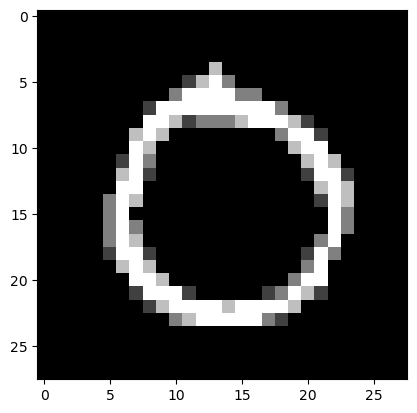

Prediction:  [8]
Label:  3


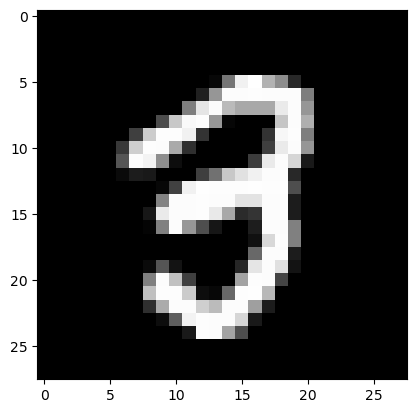

In [19]:
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)
test_prediction(8, W1, b1, W2, b2)


In [20]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[0 9 5 1 5 8 1 8 6 2 6 1 5 2 0 8 8 2 2 0 7 8 9 4 1 5 0 9 4 9 9 2 1 6 4 6 1
 5 7 2 1 8 2 1 9 0 4 1 7 2 8 2 9 1 7 7 4 9 8 5 8 6 0 4 0 3 8 2 3 6 3 7 2 4
 1 5 2 7 4 4 6 7 1 3 5 1 0 3 2 2 0 0 9 0 8 3 0 1 1 7 6 1 7 2 0 6 9 1 5 2 9
 7 3 4 9 9 6 7 0 8 3 7 8 9 9 0 4 6 7 1 2 5 3 2 7 4 6 5 6 1 4 6 1 9 2 4 7 8
 7 4 1 3 1 7 3 0 4 2 7 1 6 9 6 7 5 7 6 6 5 1 6 1 7 7 8 0 1 1 1 7 0 8 9 3 9
 2 3 9 1 9 0 9 6 9 7 8 0 9 6 1 8 2 6 4 4 9 4 8 0 6 0 4 3 9 9 9 1 3 1 8 1 7
 3 0 8 3 3 7 3 8 3 2 4 4 5 6 0 1 6 8 7 4 1 7 8 2 5 6 8 6 9 6 0 9 7 7 5 5 0
 5 4 9 0 7 7 9 6 9 6 4 8 4 4 6 7 1 8 8 4 8 4 3 6 6 7 3 9 1 1 0 1 8 6 4 9 5
 8 6 1 2 3 8 9 1 0 7 0 2 4 4 5 7 3 3 2 9 2 3 5 3 3 2 0 9 0 0 9 7 7 5 1 4 8
 6 1 0 6 1 0 4 2 3 9 7 3 0 9 4 6 9 8 6 4 4 4 1 1 4 0 7 3 1 6 3 9 9 6 7 1 1
 7 0 6 0 6 2 0 0 6 6 6 6 1 4 7 8 0 5 2 4 3 7 9 7 1 2 5 2 6 3 0 8 7 6 1 9 7
 2 1 4 9 2 5 3 9 8 0 6 1 6 8 5 0 8 5 6 7 5 1 5 0 8 8 9 8 6 1 7 9 6 6 1 0 5
 6 2 9 9 7 4 6 3 7 1 9 0 4 6 2 6 9 7 9 9 3 8 0 6 3 5 0 5 9 1 4 5 6 3 0 4 1
 5 4 0 8 3 2 2 5 8 1 9 6 

0.847